In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [57]:
AdDf=pd.read_csv('advertising.csv')
AdDf.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [58]:
## #Linear Regression model
X=AdDf[['TV','Radio','Newspaper']].values
y=AdDf['Sales'].values

In [59]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)
ML_model=LinearRegression()
ML_model.fit(Xtrain,ytrain)

LinearRegression()

In [60]:
ypred=ML_model.predict(Xtest)

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE=mean_squared_error(ytest,ypred)
MAE=mean_absolute_error(ytest,ypred)
r2Score=r2_score(ytest,ypred)
print(r2Score)
print(MSE)
print(MAE)

0.8718069474344207
3.958353281475324
1.3405402421444608


## #Polynomial Regression

In [62]:
poly_cover=PolynomialFeatures(degree=2,include_bias=False)
poly_feature=poly_cover.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.25,random_state=0)
ML_model=LinearRegression()
ML_model.fit(X_train,y_train)
y_pred = ML_model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE_poly=mean_squared_error(y_test,y_pred)
MAE_poly=mean_absolute_error(y_test,y_pred)
r2Score_poly=r2_score(y_test,y_pred)
print(r2Score_poly)
print(MSE_poly)
print(MAE_poly)

0.9155779505258297
2.606789446674599
1.1980177182372629


## #Best Degree for best Model

In [64]:
## #Linear Regression model
X1=AdDf[['TV','Radio','Newspaper']].values
y1=AdDf['Sales'].values

In [65]:
MSE1=[]
MAE1=[]
r2=[]
for d in range(1,10):
    poly_cover1 = PolynomialFeatures(degree=d,include_bias=False)
    poly_feature1 = poly_cover1.fit_transform(X1)
    X_train,X_test,y_train,y_test = train_test_split(poly_feature1,y,test_size=0.25,random_state=0)
    ML_model1 = LinearRegression()
    ML_model1.fit(X_train,y_train)
    y_pred = ML_model1.predict(X_test)
    MSE_poly = mean_squared_error(y_test,y_pred)
    MAE_poly = mean_absolute_error(y_test,y_pred)
    r2Score_poly = r2_score(y_test,y_pred)
    MSE1.append(MSE_poly)
    MAE1.append(MAE_poly)
    r2.append(r2Score_poly)
    


In [66]:
MSE1

[3.958353281475324,
 2.606789446674599,
 3.413049712880718,
 17.370635666881547,
 41.2504948722069,
 14791.84155458315,
 105344922.73164397,
 1375375686.8526626,
 23018943354.073692]

In [67]:
MAE1

[1.3405402421444608,
 1.1980177182372629,
 1.3298541932391812,
 1.9846966840201128,
 2.2005911298392844,
 20.101250452338082,
 1683.8811437050035,
 6010.760252264529,
 30910.326447633604]

In [68]:
r2

[0.8718069474344207,
 0.9155779505258297,
 0.8894668489293656,
 0.43744414588681646,
 -0.3359158421398083,
 -478.04044614270987,
 -3411641.7354915766,
 -44542159.637165025,
 -745478839.7094982]

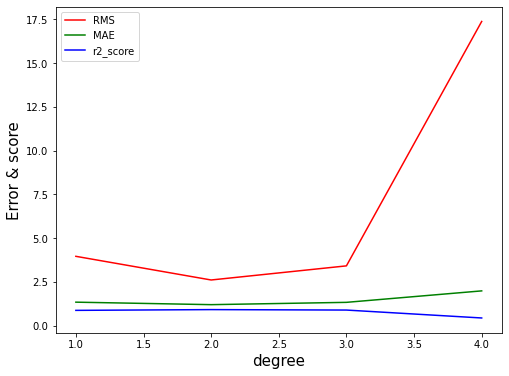

In [69]:
#plot the error and for degree
plt.figure(figsize=(8,6))
plt.plot(range(1,5),MSE1[:4],color='red',label="RMS")
plt.plot(range(1,5),MAE1[:4],color='green',label="MAE")
plt.plot(range(1,5),r2[:4],color='blue',label="r2_score")
plt.xlabel('degree',size=15)
plt.ylabel('Error & score',size=15)
plt.legend()
plt.show()


In [70]:
#help(plt.plot)

## #Regulization technique for Bias and Variance Tread-Off(Ridge Regression,Lasso Regression,Elasticnet)

In [92]:
#Regulization
from sklearn.preprocessing import StandardScaler

In [93]:
stdScalar = StandardScaler()

In [94]:
stdScalar.fit(X_train)
X_train=stdScalar.transform(X_train)

In [95]:
X_test=stdScalar.transform(X_test)

In [96]:
#Ridge Regression
from sklearn.linear_model import Ridge
reg_Ridge=Ridge(alpha=100)

In [97]:
reg_Ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [98]:
pred_ridge=reg_Ridge.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE_ridge=mean_squared_error(y_test,pred_ridge)
MAE_ridge=mean_absolute_error(y_test,pred_ridge)
r2Score_ridge=r2_score(y_test,pred_ridge)
print("MSE_ridge:- ",MSE_ridge)
print("MAE_ridge:- ",MAE_ridge)
print("r2Score_ridge:- ",r2Score_ridge)

MSE_ridge:-  6.591717380529975
MAE_ridge:-  1.8920337603059525
r2Score_ridge:-  0.7865242658824085


In [101]:
## Cross-Validation using RidgeCV
from sklearn.linear_model import RidgeCV


In [103]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10,100.0))

In [104]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([  0.1,   1. ,  10. , 100. ]))

In [105]:
ridge_cv_model.alpha_

10.0

In [109]:
#from sklearn.metrics import SCORERS

In [110]:
#SCORERS.keys()

In [120]:
test_predictions=ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
MSE=mean_squared_error(y_test,test_predictions)
r2_Score=r2_score(y_test,test_predictions)

In [115]:
MAE

1.6833075384818441

In [116]:
RMSE

2.690346470274831

In [118]:
MSE

7.2379641301202415

In [121]:
r2_Score

0.7655952740391936

## #LASSO:- Least Absolute Shrinkage and Selection Operator

In [125]:
from sklearn.linear_model import LassoCV
lass_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=10000)
lass_cv_model.fit(X_train,y_train)
lass_cv_model.alpha_
test_predict=lass_cv_model.predict(X_test)
#test_predictions=ridge_cv_model.predict(X_test)
Lasso_MAE = mean_absolute_error(y_test,test_predict)
Lasso_RMSE = np.sqrt(mean_squared_error(y_test,test_predict))
Lasso_MSE=mean_squared_error(y_test,test_predict)
Lasso_r2_Score=r2_score(y_test,test_predict)

In [136]:
Lasso_MAE

1.2382104408233032

In [137]:
Lasso_MSE

2.908470106341769

In [138]:
Lasso_RMSE

1.7054237321973003

In [139]:
Lasso_r2_Score

0.9058078865844126

In [140]:
lass_cv_model.coef_

array([ 4.48170163,  0.3771976 , -0.00975208, -0.        ,  0.95591516,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.04678336,  0.        , -0.60717158,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.25407396,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.  

## #ElasticNet Regression

In [158]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1],n_alphas=100,eps=0.001,max_iter=10000)

In [163]:
elasticNet.l1_ratio_

1.0

In [164]:
elasticNet.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000)

In [167]:
Electic_pred=elasticNet.predict(X_test)

In [166]:
elasticNet.alpha_

0.02633007767726182

In [168]:
#test_predictions=ridge_cv_model.predict(X_test)
Elastic_MAE = mean_absolute_error(y_test,Electic_pred)
Elastic_RMSE = np.sqrt(mean_squared_error(y_test,Electic_pred))
Elastic_MSE=mean_squared_error(y_test,Electic_pred)
Elastic_r2_Score=r2_score(y_test,Electic_pred)

In [169]:
print("Elastic_MAS:- ",Elastic_MAE)
print('Elastic_RMSE:- ',Elastic_RMSE)
print('Elastic_MSE:- ',Elastic_MSE)
print('Elastic_r2_Score:- ',Elastic_r2_Score)

Elastic_MAS:-  1.2382104408233032
Elastic_RMSE:-  1.7054237321973003
Elastic_MSE:-  2.908470106341769
Elastic_r2_Score:-  0.9058078865844126
